In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("car_ownership.csv")

In [ ]:
df.head(5)

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Occupation           486 non-null    object 
 1   Monthly Income       484 non-null    object 
 2   Credit Score         461 non-null    float64
 3   Years of Employment  459 non-null    object 
 4   Finance Status       479 non-null    object 
 5   Finance History      474 non-null    object 
 6   Car                  482 non-null    object 
 7   Number of Children   411 non-null    object 
dtypes: float64(1), object(7)
memory usage: 30.5+ KB


In [ ]:
na_values_sum = df.isna().sum()
print(na_values_sum)

Occupation              0
Monthly Income          2
Credit Score           25
Years of Employment    27
Finance Status          7
Finance History        12
Car                     4
Number of Children     75
dtype: int64


In [ ]:
median_credit_score = df['Credit Score'].median()
print(median_credit_score)
df['Credit Score'].fillna(median_credit_score, inplace=True)

700.0


In [ ]:
na_values_sum = df.isna().sum()
print(na_values_sum)

Occupation              0
Monthly Income          2
Credit Score            0
Years of Employment    27
Finance Status          7
Finance History        12
Car                     4
Number of Children     75
dtype: int64


In [ ]:
unique_credit_scores = df['Credit Score'].unique()

# Printing all unique values in the Credit Score column
print(unique_credit_scores)

[750. 800. 650. 900. 700. 600. 850. 820. 720. 780. 550. 740. 690. 620.
 680. 760. 670. 500. 790. 610. 590. 730. 640. 630. 710. 660. 840. 890.
 770. 830. 560. 810. 570. 689. 755. 765. 631. 643. 718. 598. 806. 642.
 693. 728. 724. 672. 703. 792. 678. 723. 775. 758. 702. 795. 715. 654.
 742. 732. 695. 726. 725. 708. 745. 641.]


In [ ]:
unique_salaries = df['Monthly Income'].unique()
print(unique_salaries)

['40000' '60000' '25000' '80000' '100000' '50000' '35000' '20000' '120000'
 '90000' '6000' '3000' '4000' '8000' '9000' '12000' '5000' '7000' '3500'
 '2500' '5500' '4500' '10000' '2000' '$4,500 ' '$7,800 ' '$3,200 '
 '$6,500 ' '$3,000 ' '$3,800 ' '$10,000 ' '$2,500 ' '$5,200 ' '$3,700 '
 '$8,500 ' '$6,200 ' '$2,800 ' '$9,000 ' '$6,000 ' '$3,500 ' '$5,800 '
 '$6,800 ' '$2,700 ' '$3,600 ' '$9,200 ' '$3,100 ' '$7,000 ' '$4,800 '
 '$4,200 ' '$7,500 ' '$5,000 ' '3.2k USD' '8.5k USD' '9k' '$4,000 '
 '$8,000 ' '$15,000 ' '5k' '$9,500 ' '$5,500 ' '$12,000 ' '15k' '$2,000 '
 '$1,500 ' '$7,200 ' '2.8k' '7.5k' '5000 usd' '2500 usd' '8000 usd'
 '9000 USD' '10000 USD' '3500 USD' '2.5k' '6000 usd' '4500 usd' '$2,200 '
 '$2,900 ' '$4,100 ' '$8,200 ' '$3,900 ' '$4,400 ' '$6,100 ' '$3,400 '
 '$8,400 ' '$11,000 ' '$4,600 ' '$5,400 ' nan '11k' '$8,600 ' '3400 usd'
 '$6,900 ' '$4,300 ' '3200 USD' '$10,500 ' '$7 ']


In [ ]:
# Define a function to convert amounts to rupees
def convert_to_inr(amount):
    if pd.isnull(amount):
        return amount

    amount = amount.replace(',', '').strip()  # Remove commas and whitespace

    # Handle 'k' or 'K' for thousand
    if 'k' in amount or 'K' in amount:
        amount = amount.replace('k', '000').replace('K', '000')
        if 'USD' in amount or 'usd' in amount or '$' in amount:
            amount = amount.replace('USD', '').replace('usd', '').replace('$', '').strip()
            amount = float(amount) * 83
        else:
            amount = float(amount)

    # Handle 'USD' or '$'
    elif 'USD' in amount or 'usd' in amount or '$' in amount:
        amount = amount.replace('USD', '').replace('usd', '').replace('$', '').strip()
        amount = float(amount) * 83

    # Handle plain numeric values
    else:
        amount = float(amount)

    return amount

# Apply the conversion function to the 'Monthly Income' column
df['Monthly Income'] = df['Monthly Income'].apply(convert_to_inr)

# Replace NaN values with median of the column
median_value = df['Monthly Income'].median()
df['Monthly Income'].fillna(median_value, inplace=True)

In [ ]:
print(median_value)

352750.0


In [ ]:
# Replace NaN values with 0 in 'Years of Employment'
df['Years of Employment'].fillna(0, inplace=True)

In [ ]:
df['Years of Employment'].unique()

array(['10', '8', '5', '12', '15', '6', '3', '20', '1', '7', '4', '2',
       '0', '3 years', '5 years', '2 years', '7 years', '1 year',
       '4 years', '8 years', '6 years', '2 y', '3 year', '2 year',
       '6 year', '7 year', '10 years', '12 years', '3 y', '9 years',
       '11 years', '8 year', '4 year', '5 year', 0, '7 y'], dtype=object)

In [ ]:
# Define a function to convert years of employment to integers
def convert_to_years(employment):
    employment = str(employment).lower().replace('years', '').replace('year', '').replace('y', '').strip()
    return employment

# Apply the conversion function to the 'Years of Employment' column
df['Years of Employment'] = df['Years of Employment'].apply(convert_to_years)

In [ ]:
df['Finance Status'].unique()

array(['Good', 'Fair', 'Excellent', 'Poor', 'Stable', 'Unstable',
       'Unknow', 'Unkonw', nan], dtype=object)

In [ ]:
# Define a function to correct misspelled values and handle NaNs
def clean_finance_status(status):
    if pd.isnull(status):
        return 'Unknown'
    elif status in ['Unknow', 'Unkonw']:
        return 'Unknown'
    return status

# Apply the function to the 'Finance Status' column
df['Finance Status'] = df['Finance Status'].apply(clean_finance_status)
df['Finance Status'] = df['Finance Status'].fillna('Unknown')

In [ ]:
# Drop rows where the 'Car' column contains NaN values
df = df.dropna(subset=['Car'])

In [ ]:
unique_finance_history = df['Finance History'].unique()
print(unique_finance_history)

['No issues' 'Late payment 2 months ago' 'Late payment 6 months ago'
 'Late payment 3 months ago' 'Late payment 1 month ago' 'Excellent' 'Poor'
 'Good' 'Fair' 'no significant  issues' 'No significant issues'
 'Missed payments in the past' 'Late payments' 'Late payment'
 'No significant issue' 'Late payments, collections'
 'Missed payments, collections, charge-offs' nan]


In [ ]:
# Define a function to categorize finance history
def categorize_finance_history(history):
    if pd.isnull(history):
        return 'No issue'
    elif history in ['No issues', 'no significant  issues', 'No significant issues', 'No significant issue']:
        return 'No issue'
    elif history in ['Late payment 2 months ago', 'Late payment 6 months ago', 'Late payment 3 months ago',
                     'Late payment 1 month ago', 'Late payments', 'Late payment', 'Late payments, collections']:
        return 'Late payment'
    elif history in ['Missed payments in the past', 'Missed payments, collections, charge-offs']:
        return 'Missed payments'
    else:
        return history  # return the same value for anything else

# Apply the categorization function to the 'Finance History' column
df['Finance History'] = df['Finance History'].apply(categorize_finance_history)

# Get unique values in the grouped finance history
unique_finance_history_grouped = df['Finance History'].unique()
print(unique_finance_history_grouped)

['No issue' 'Late payment' 'Excellent' 'Poor' 'Good' 'Fair'
 'Missed payments']


In [ ]:
df['Number of Children'] = df['Number of Children'].fillna(2)

In [ ]:
df['Car'].value_counts()

Car
Yes    302
No     180
Name: count, dtype: int64

In [ ]:
# Create count plot using Plotly Express
fig = px.bar(df['Car'].value_counts(), x=df['Car'].value_counts().index, y=df['Car'].value_counts().values,
             labels={'x': 'Car', 'y': 'Count'}, title='Count Plot of Car Column')

# Show the plot
fig.show()

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df['Car'] == 'Yes']
df_minority = df[df['Car'] == 'No']

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples=len(df_majority), # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])

# Display new class distribution
print("New class distribution after oversampling:")
print(df['Car'].value_counts())

New class distribution after oversampling:
Car
Yes    302
No     302
Name: count, dtype: int64


In [ ]:
# Create count plot using Plotly Express
fig = px.bar(df['Car'].value_counts(), x=df['Car'].value_counts().index, y=df['Car'].value_counts().values,
             labels={'x': 'Car', 'y': 'Count'}, title='Count Plot of Car Column')

# Show the plot
fig.show()

In [ ]:
df.shape

(604, 8)

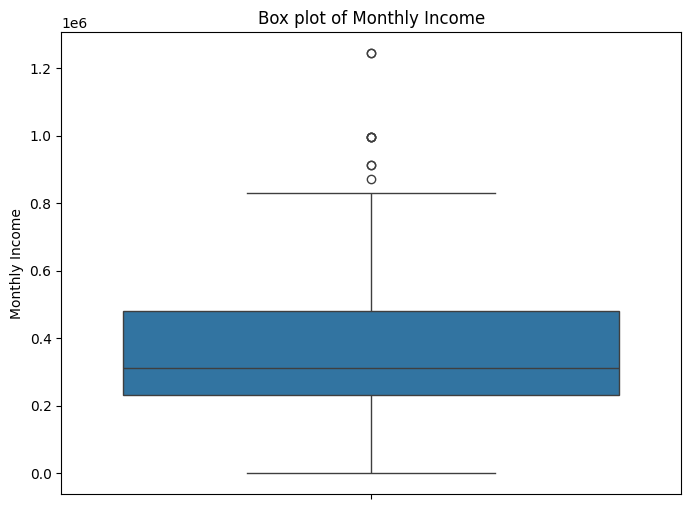

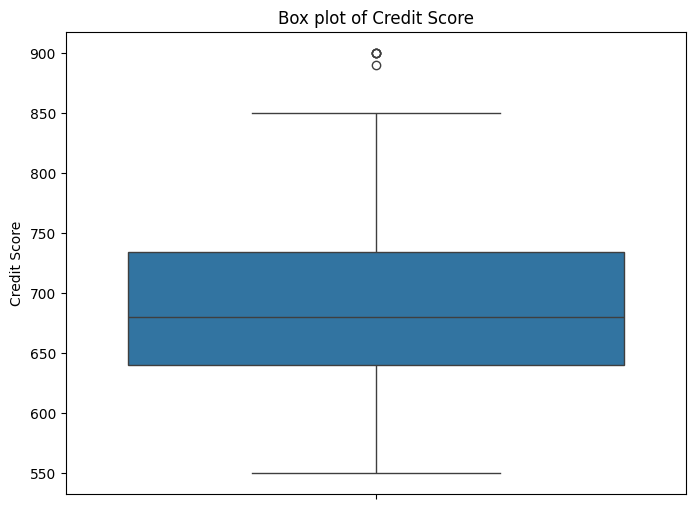

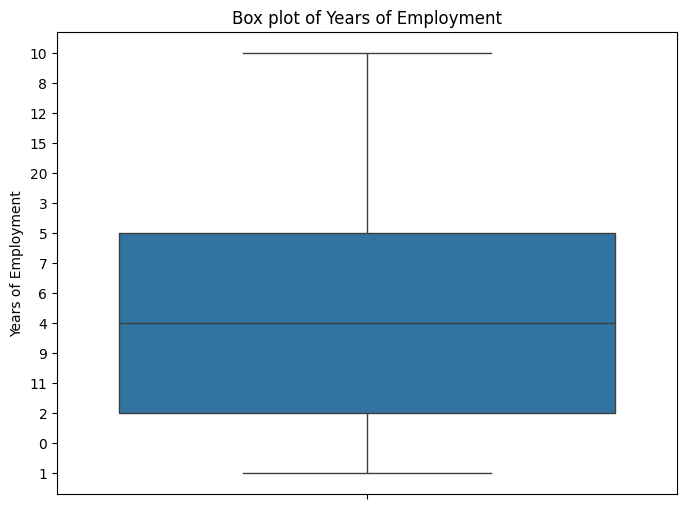

In [ ]:
# Box plot for numerical features
numerical_features = ['Monthly Income', 'Credit Score', 'Years of Employment']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [ ]:
# Pie chart for 'Finance History'
fig1 = px.pie(df, names='Finance History', title='Pie Chart of Finance History')
fig1.show()

# Pie chart for 'Finance Status'
fig2 = px.pie(df, names='Finance Status', title='Pie Chart of Finance Status')
fig2.show()

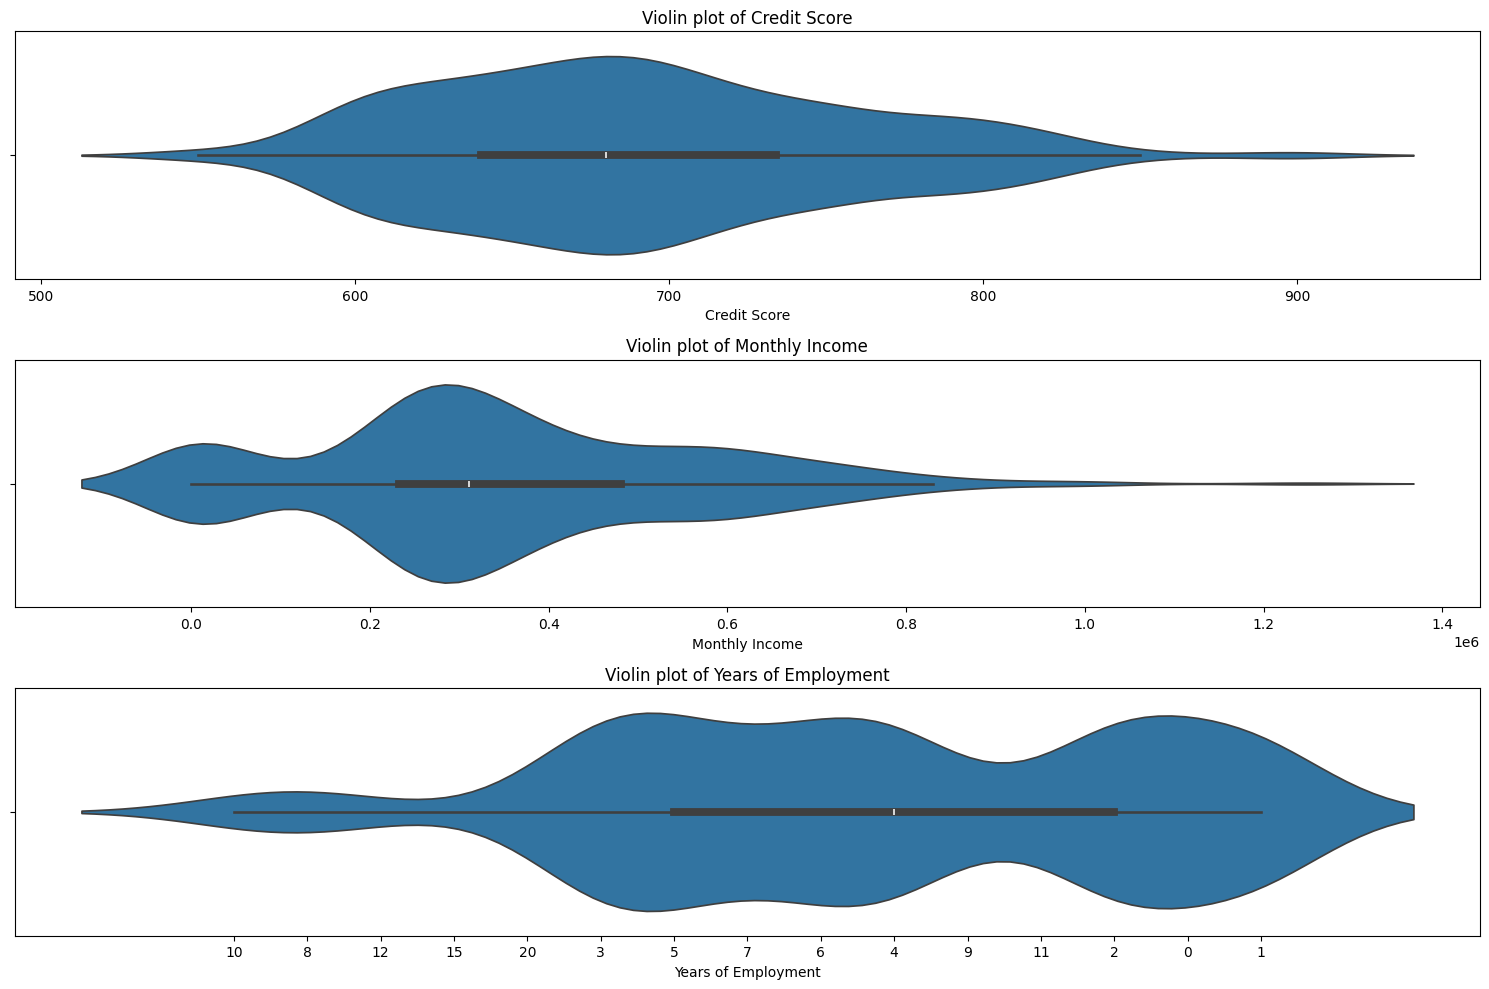

In [ ]:
# List of numerical features to plot
numerical_features = ['Credit Score', 'Monthly Income', 'Years of Employment']

# Create violin plots
plt.figure(figsize=(15, 10))

# Violin plot for Credit Score
plt.subplot(3, 1, 1)
sns.violinplot(x=df['Credit Score'])
plt.title('Violin plot of Credit Score')

# Violin plot for Monthly Income
plt.subplot(3, 1, 2)
sns.violinplot(x=df['Monthly Income'])
plt.title('Violin plot of Monthly Income')

# Violin plot for Years of Employment
plt.subplot(3, 1, 3)
sns.violinplot(x=df['Years of Employment'])
plt.title('Violin plot of Years of Employment')

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000.0,750.0,10,Good,No issue,Yes,2
1,Engineer,60000.0,800.0,8,Good,No issue,Yes,1
3,Doctor,80000.0,900.0,12,Excellent,No issue,Yes,3
4,Businessman,100000.0,700.0,15,Good,Late payment,Yes,2
6,Teacher,35000.0,700.0,8,Fair,Late payment,Yes,1


In [ ]:
occupation_counts = df['Occupation'].value_counts()
print("Count of each occupation:")
print(occupation_counts)

Count of each occupation:
Occupation
Chef                     66
Electrician              28
Graphic Designer         18
Nurse                    17
Personal Trainer         16
                         ..
Nurse Practitioner        1
Marketing Analyst         1
Management Consultant     1
HR Manager                1
HR Specialist             1
Name: count, Length: 111, dtype: int64


In [ ]:
rare_occupations = occupation_counts[occupation_counts <= 3].index.tolist()

# Replace these occupations with 'Other'
df['Occupation'] = df['Occupation'].apply(lambda x: 'Other' if x in rare_occupations else x)

# Count of occupations after grouping rare ones into 'Other'
occupation_counts_updated = df['Occupation'].value_counts()

print("\nCount of each occupation after grouping into 'Other':")
print(occupation_counts_updated)


Count of each occupation after grouping into 'Other':
Occupation
Other                         91
Chef                          66
Electrician                   28
Graphic Designer              18
Nurse                         17
Personal Trainer              16
Salesperson                   14
Engineer                      13
Teacher                       13
Accountant                    12
Architect                     12
Photographer                  10
Web Developer                 10
Insurance Agent               10
Dental Hygienist              10
Physical Therapist            10
Real Estate Agent              9
Sales Manager                  9
Sales Representative           9
Dental Assistant               9
Social Worker                  9
Event Planner                  8
Bank Teller                    8
Customer Service Rep           8
Writer                         8
Marketing Manager              8
Veterinarian                   8
Web Designer                   8
Mechanic  

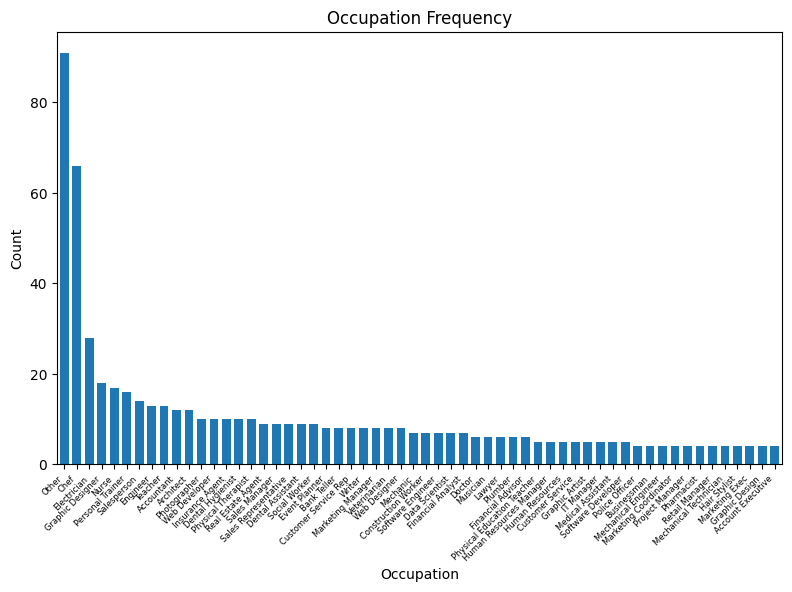

In [ ]:
# Count of each occupation
occupation_counts = df['Occupation'].value_counts()

# Plotting bar plot with adjusted width and x-axis labels font size
plt.figure(figsize=(8, 6))
occupation_counts.plot(kind='bar', width=0.7)
plt.title('Occupation Frequency', fontsize=12)
plt.xlabel('Occupation', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.tight_layout(pad=1.0)
plt.show()

In [ ]:
df['Number of Children'].replace({'na': 2}, inplace=True)

In [ ]:
# Countplot using Plotly
fig = px.histogram(df, x='Number of Children', title='Number of Children Count', labels={'Number of Children': 'Number of Children'})
fig.update_layout(xaxis_type='category')  # Ensure x-axis treats the number of children as categorical
fig.show()

In [ ]:
df.loc[df['Monthly Income'] < 10, 'Monthly Income'] *= 10000
df.loc[(df['Monthly Income'] >= 10) & (df['Monthly Income'] < 1000), 'Monthly Income'] *= 100
df.loc[df['Monthly Income'] > 150000, 'Monthly Income'] /= 10

In [ ]:
df.to_csv("processed_data_car.csv")